In [1]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

In [2]:
data = load_google_sheet()

In [3]:
data

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything
...,...,...,...,...
494,2023-12-02 19:49:22,Extremely likely,always responding on time and no delay while w...,everything is good
495,2023-12-02 22:42:41,Extremely likely,she was so kind,nothing special
496,2023-12-03 15:49:21,Extremely likely,very good and quick service,
497,2023-12-04 12:41:52,Extremely likely,the nurse alex was amazing as usualthank you,reception team needs to be more professional ...


In [4]:
for item in data['free_text']:
    print(item)

very friendly caring staff treated me with respect and listened to my problem
so good so confidential
the doctor was very understanding and very knowledgeable
dr e was extremely nice
i was spoken to politely on the phone and a telephone appointment arranged with my doctor which due to a mistake on a locked phone i wasn’t able to answer but i was called back twice to complete my assessment of my health worry

very professional and very kind i feel comfortable when i attend my appointment there
faster appointment  treatment 
love the practice
the nurse miss aleksandra florko was absolutely amazing understanding kind fun thorough careful she is the best
i have been with surgery for considerable  years and was well looked after by dr param  hoping the work ethic continues apart that good service good location etc
efficient friendly  staff
good service
because the staff are very helpful
nurse alex is really helpful and look after us
friendly  professional and easily accessible
dr great
the 

In [13]:
data2 = pd.read_csv('../friendsfamilytest/data/data.csv')
data2

,time,rating,free_text,do_better,classif,classif_scores,sentiment,sentiment_score,free_text_summary,rating_score
0,2023-07-13 15:28:22,Extremely likely,very friendly caring staff treated me with res...,keep it up,admiration,0.588930,positive,0.866406,very friendly caring staff treated me with res...,5.0
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,admiration,0.910946,positive,0.925523,so good so confidential so confidential . so c...,5.0
2,2023-07-13 15:29:21,Extremely likely,the doctor was very understanding and very kno...,no it was the best,admiration,0.875547,positive,0.968350,the doctor was very understanding and very kno...,5.0
3,2023-07-13 15:30:10,Extremely likely,dr e was extremely nice,the receptionist was very unkind,admiration,0.905494,positive,0.975969,dr e was extremely nice .,5.0
4,2023-07-13 15:31:48,Extremely likely,i was spoken to politely on the phone and a te...,no i was happy with everything,neutral,0.234010,neutral,0.757862,i was spoken to politely on the phone and a,5.0
...,...,...,...,...,...,...,...,...,...,...
494,2023-12-02 19:49:22,Extremely likely,always responding on time and no delay while w...,everything is good,neutral,0.761297,positive,0.640596,always responding on time and no delay while w...,5.0
495,2023-12-02 22:42:41,Extremely likely,she was so kind,nothing special,admiration,0.926939,positive,0.900173,she was so kind and kind .,5.0
496,2023-12-03 15:49:21,Extremely likely,very good and quick service,NaN,admiration,0.941572,positive,0.934329,very good and quick service. very good service...,5.0
497,2023-12-04 12:41:52,Extremely likely,the nurse alex was amazing as usualthank you,reception team needs to be more professional ...,gratitude,0.951041,positive,0.984073,the nurse alex was amazing as usualthank you ....,5.0


<Axes: >

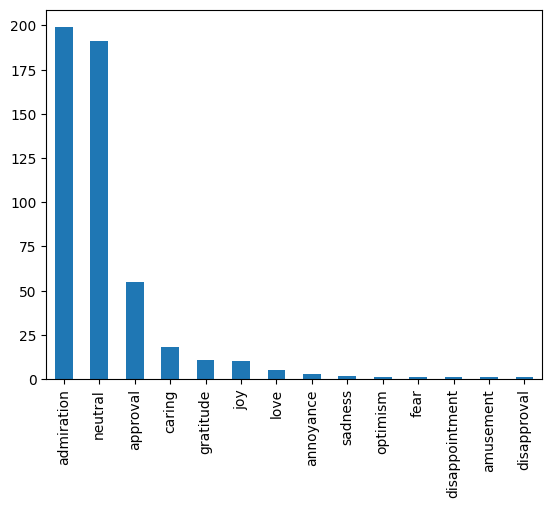

In [11]:
data2['classif'].value_counts().plot(kind='bar')

<Axes: >

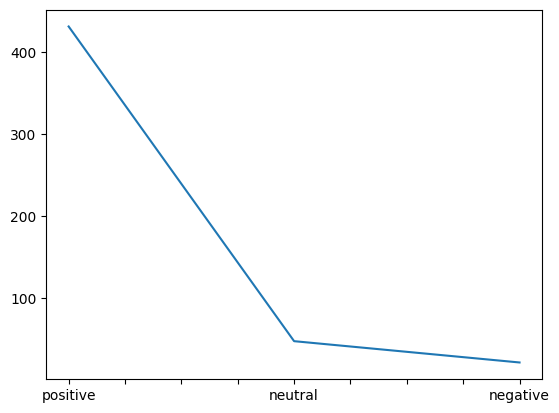

In [12]:
data2['sentiment'].value_counts().plot()